In [1]:
import numpy as np
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
figlist = []

#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
#********************************************************************************************************
mList = ['o','v','^','<','>','s','p','*','H','+','X','D']
cList = ['#0072b2','#009e73','#d55e00','#cc79a7','#56b4e9']
cmap = ListedColormap([np.array([0, 114.0/256, 178.0/256, 1]),
                       np.array([0, 158.0/256, 115.0/256, 1]),
                       np.array([213.0/256, 94.0/256, 0, 1]),
                       np.array([204.0/256, 121.0/256, 167.0/256, 1]),
                       np.array([86.0/256, 180.0/256, 233.0/256, 1])])

In [2]:
calcSpec = np.loadtxt('MokuPhasemeterData_20190607_181613_Timeseries_ASD.txt')  #Calculated by mokuReadFreqNoise.py
mokuSpec = np.loadtxt('MokuPhasemeterData_20190607_181631_Spectra.csv',comments='%',delimiter=',') #Calculated by moku

In [3]:
labList=['Wenzel Crystal on Moku by code',
         'Marconi on Moku by code',
         'Difference by code',
         'Wenzel Crystal on Moku by Moku',
         'Marconi on Moku by Moku',
         'Difference by Moku']
ff = calcSpec[:,0]
ff2 = mokuSpec[:,0]

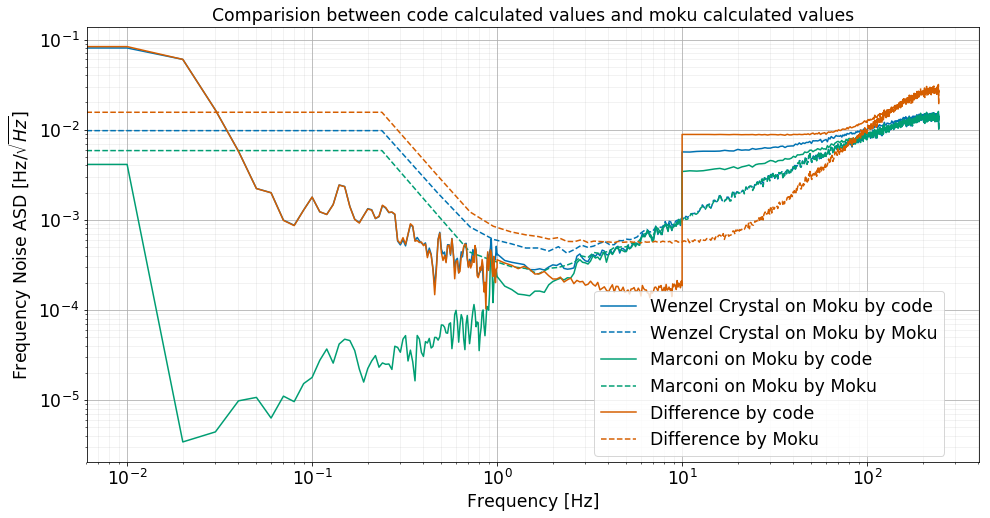

In [4]:
fig = plt.figure(figsize=[16,8])
ii=0
for ii in range(3):
    plt.loglog(ff,calcSpec[:,ii+1],label=labList[ii],c=cList[ii])
    plt.loglog(ff2,np.sqrt(mokuSpec[:,ii+1]),label=labList[ii+3],c=cList[ii],linestyle='--')
    ii=ii+1
fig.gca().set_xlabel('Frequency [Hz]')
fig.gca().set_ylabel('Frequency Noise ASD [Hz/$\sqrt{Hz}$]')
fig.gca().set_title('Comparision between code calculated values and moku calculated values')
fig.legend(loc=(0.6,0.12))
fig.gca().grid('on', which='both')
fig.gca().grid(alpha=0.2, which='minor')
figlist += [fig]

In [5]:
pp = PdfPages('MokuReadFreqNoiseCheck.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()